<a href="https://colab.research.google.com/github/prad69/NLP/blob/main/NLP_Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Captioning
Predict an approprite caption for an image

In [ ]:
import string
import re
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, RepeatVector,TimeDistributed
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.models import load_model
from pickle import dump
from unicodedata import normalize
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer

### Flickr8K dataset
Consists of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events. The images were chosen from six different Flickr groups, and tend not to contain any well-known people or locations, but were manually selected to depict a variety of scenes and situations.

In [ ]:

# Download the images first!
!wget "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"

--2025-11-09 18:14:21--  https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/124585957/47f52b80-3501-11e9-8f49-4515a2a3339b?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-09T19%3A04%3A57Z&rscd=attachment%3B+filename%3DFlickr8k_Dataset.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-09T18%3A04%3A38Z&ske=2025-11-09T19%3A04%3A57Z&sks=b&skv=2018-11-09&sig=GDmGAQxzy3dl3hwUs64iFMsCAg1D8pPAvsP7l5uM%2FoU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MjcxNTY2MSwibmJmIjoxNzYyNzEyMDYxLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZ

In [ ]:
!unzip Flickr8k_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Flicker8k_Dataset/._342872408_04a2832a1b.jpg  
  inflating: Flicker8k_Dataset/3429142249_d09a32e291.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429142249_d09a32e291.jpg  
  inflating: Flicker8k_Dataset/3429194423_98e911a101.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429194423_98e911a101.jpg  
  inflating: Flicker8k_Dataset/3429351222_17ae744daf.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351222_17ae744daf.jpg  
  inflating: Flicker8k_Dataset/3429351964_531de1bf16.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351964_531de1bf16.jpg  
  inflating: Flicker8k_Dataset/3429391520_930b153f94.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429391520_930b153f94.jpg  
  inflating: Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._34295

In [ ]:
# Download the image captions
!wget "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip"

--2025-11-09 18:14:56--  https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/124585957/47f52b80-3501-11e9-8d2e-dd69a21a4362?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-09T19%3A05%3A08Z&rscd=attachment%3B+filename%3DFlickr8k_text.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-09T18%3A04%3A52Z&ske=2025-11-09T19%3A05%3A08Z&sks=b&skv=2018-11-09&sig=pvQtWASeJn8ZhPE6Fiu4y0m3KSfcrV9quXLMkQYz6hg%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MjcxMjM5NiwibmJmIjoxNzYyNzEyMDk2LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvb

In [ ]:
!unzip Flickr8k_text.zip

Archive:  Flickr8k_text.zip
  inflating: CrowdFlowerAnnotations.txt  
  inflating: ExpertAnnotations.txt   
  inflating: Flickr8k.lemma.token.txt  
  inflating: __MACOSX/._Flickr8k.lemma.token.txt  
  inflating: Flickr8k.token.txt      
  inflating: Flickr_8k.devImages.txt  
  inflating: Flickr_8k.testImages.txt  
  inflating: Flickr_8k.trainImages.txt  
  inflating: readme.txt              


In [ ]:
# Function for reading the txt files
def load_doc(filename):
    file = open(filename, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [ ]:
info = load_doc("readme.txt")
print(info)

If you use this corpus / data:

Please cite: M. Hodosh, P. Young and J. Hockenmaier (2013) "Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics", Journal of Artifical Intellegence Research, Volume 47, pages 853-899
http://www.jair.org/papers/paper3994.html


Captions, Dataset Splits, and Human Annotations :


Flickr8k.token.txt - the raw captions of the Flickr8k Dataset . The first column is the ID of the caption which is "image address # caption number"

Flickr8k.lemma.txt - the lemmatized version of the above captions 

Flickr_8k.trainImages.txt - The training images used in our experiments
Flickr_8k.devImages.txt - The development/validation images used in our experiments
Flickr_8k.testImages.txt - The test images used in our experiments


ExpertAnnotations.txt is the expert judgments.  The first two columns are the image and caption IDs.  Caption IDs are <image file name>#<0-4>.  The next three columns are the expert judgments for that image-caption pai

### Storing the path of Train, Val and Test Images

In [ ]:
train_path = "Flickr_8k.trainImages.txt"
train_imgs = load_doc(train_path) #trainImages.txt contains the filenames of the training images.

#Each filename is given in the new line.
print(len(train_imgs.split('\n')[:-1])) #Total no. of images in the file

6000


In [ ]:
val_path = "Flickr_8k.devImages.txt"
val_imgs = load_doc(val_path) #devImages.txt contains the filenames of the validation images.

#Each filename is given in the new line.
print(len(val_imgs.split('\n')[:-1])) #Total no. of images in the file

1000


In [ ]:
test_path = "Flickr_8k.testImages.txt"
test_imgs = load_doc(test_path) #devImages.txt contains the filenames of the validation images.

#Each filename is given in the new line.
print(len(test_imgs.split('\n')[:-1])) #Total no. of images in the file

1000


In [ ]:
train_imgs = train_imgs.split("\n")[:-1]
val_imgs = val_imgs.split("\n")[:-1]
test_imgs = test_imgs.split("\n")[:-1]

In [ ]:
train_imgs[:3]

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg']

### Storing the corresponding captions

In [ ]:
caps = load_doc("Flickr8k.token.txt")
caps = caps.split("\n")[:-1]
len(caps)
#Approx 5 captions per image  (8000 * 5)

40460

In [ ]:
caps[:6]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting']

In [ ]:
# Loading the image captions in a dictionary
imgs_caps = {}

for i in range(len(caps)):
  info = caps[i].split("\t")

  if len(info) <= 1:
    break

  file_name_t = info[0]
  f_name = file_name_t.split("#")[0]

  if f_name not in imgs_caps:
    imgs_caps[f_name] = []
  imgs_caps[f_name].append(info[1])

In [ ]:
print(train_imgs[0]) # 1st image in the training set
imgs_caps[train_imgs[0]] # Corresponding Captions

2513260012_03d33305cf.jpg


['A black dog is running after a white dog in the snow .',
 'Black dog chasing brown dog through snow',
 'Two dogs chase each other across the snowy ground .',
 'Two dogs play together in the snow .',
 'Two dogs running through a low lying body of water .']

In [ ]:
len(imgs_caps)
# It appears that captions for some extra images are present.

8092

In [ ]:
#import pandas as pd
#caps_df = pd.DataFrame(caps, columns = ['Captions'])
#imgs_names = []
#for each in caps_df['Captions'].str.split('#'):
#    imgs_names.append(each[0])

#img_df = pd.DataFrame(imgs_names, columns = ['Names'])
#img_df.drop_duplicates()

In [ ]:
# Loading the training data's captions
train_caps = {}

for i in range(len(train_imgs)):
    if (train_imgs[i] == ""):
        break

    if train_imgs[i] not in train_caps:
        train_caps[train_imgs[i]] = []

    req_arr = imgs_caps[train_imgs[i]]
    for s in req_arr:
        train_caps[train_imgs[i]].append(s.lower())

In [ ]:
len(train_caps), len(train_imgs)

(6000, 6000)

In [ ]:
# Loading test image captions

test_caps = {}
for i in range(len(test_imgs)):
  if test_imgs[i] not in test_caps:
    test_caps[test_imgs[i]] = []

  if (test_imgs[i] == ""):
    break

  req_arr = imgs_caps[test_imgs[i]]
  for s in req_arr:
    test_caps[test_imgs[i]].append(s.lower())

In [ ]:
len(test_caps), len(test_imgs)

(1000, 1000)

In [ ]:
#Loading the validation captions
val_caps = {}

for i in range(len(val_imgs)):
  if val_imgs[i] not in val_caps:
    val_caps[val_imgs[i]] = []

  if (val_imgs[i] == ""):
    break

  req_arr = imgs_caps[val_imgs[i]]
  for s in req_arr:
    val_caps[val_imgs[i]].append(s.lower())


In [ ]:
len(val_caps), len(val_imgs)

(1000, 1000)

# Preprocessing Captions for Input

In [ ]:
tot_text = ""
for keys in imgs_caps.keys():
    for i in range(len(imgs_caps[keys])):
        tot_text += imgs_caps[keys][i]

In [ ]:
tot_text = tot_text.lower()

In [ ]:
temp_text = tot_text.split(".")
txt_1 = ""
for i in temp_text:
    txt_1 += i

In [ ]:
words = txt_1.split(" ")
#words

In [ ]:
words_f = []
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

for w in words:
  for ele in punc:
    if w.startswith(ele):
      w = w.replace(ele, "")

    if w.endswith(ele):
      w = w.replace(ele, "")

  if w.isalpha():
    words_f.append(w)

<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipython-input-139237338.py:2: SyntaxWarning: invalid escape sequence '\,'
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


In [ ]:
def save_clean_data(words ,filename):
    dump(words, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [ ]:
filename = "refined_words.txt"
save_clean_data(words_f, filename)

Saved: refined_words.txt


In [ ]:


train_c = list(train_caps.values())
# print(train_c[:10])

train_cap_s = []

for i in range(len(train_c)):
  for j in range(len(train_c[i])):
    for ele in (train_c[i][j]):
      if ele in punc:
        train_c[i][j] = train_c[i][j].replace(ele, "")

for i in range(len(train_c)):
  temp = []
  for j in range(len(train_c[i])):

    if train_c[i][j][-2:] == " .":
      s = train_c[i][j][:-2]

    elif  train_c[i][j][-1:] == ".":
      s = train_c[i][j][:-1]

    else:
      s = train_c[i][j]

    temp.append(s)

  train_cap_s.append(temp)

In [ ]:
train_cap_s

[['a black dog is running after a white dog in the snow ',
  'black dog chasing brown dog through snow',
  'two dogs chase each other across the snowy ground ',
  'two dogs play together in the snow ',
  'two dogs running through a low lying body of water '],
 ['a little baby plays croquet ',
  'a little girl plays croquet next to a truck ',
  'the child is playing croquette by the truck ',
  'the kid is in front of a car with a put and a ball ',
  'the little boy is playing with a croquet hammer and ball beside the car '],
 ['a brown dog in the snow has something hot pink in its mouth ',
  'a brown dog in the snow holding a pink hat ',
  'a brown dog is holding a pink shirt in the snow ',
  'a dog is carrying something pink in its mouth while walking through the snow ',
  'a dog with something pink in its mouth is looking forward '],
 ['a brown dog is running along a beach ',
  'a brown dog wearing a black collar running across the beach ',
  'a dog walks on the sand near the water ',

In [ ]:
val_c = list(val_caps.values())

for i in range(len(val_c)):
  for j in range(len(val_c[i])):
    for ele in (val_c[i][j]):
      if ele in punc:
        val_c[i][j] = val_c[i][j].replace(ele, "")

val_cap_s = []

for i in range(len(val_c)):
  temp = []
  for j in range(len(val_c[i])):
    if val_c[i][j][-2:] == " .":
      s = val_c[i][j][:-2]

    elif  val_c[i][j][-1:] == ".":
      s = val_c[i][j][:-1]

    else:
      s = val_c[i][j]

    temp.append(s)

  val_cap_s.append(temp)

In [ ]:
test_c = list(test_caps.values())
test_cap_s = []

for i in range(len(test_c)):
  for j in range(len(test_c[i])):
    for ele in (test_c[i][j]):
      if ele in punc:
        test_c[i][j] = test_c[i][j].replace(ele, "")

for i in range(len(test_c)):
  temp = []
  for j in range(len(test_c[i])):
    if test_c[i][j][-2:] == " .":
      s = test_c[i][j][:-2]

    elif  test_c[i][j][-1:] == ".":
      s = test_c[i][j][:-1]

    else:
      s = test_c[i][j]

    temp.append(s)

  test_cap_s.append(temp)

In [ ]:
def get_sentences(caps):
  sentences = []

  for i in range(len(caps)):
    sentences += caps[i]

  return sentences

In [ ]:
train_sen = get_sentences(train_cap_s)
val_sen = get_sentences(val_cap_s)
test_sen = get_sentences(test_cap_s)
#train_sen

In [ ]:
#words_f

In [ ]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

eng_tokenizer = create_tokenizer(words_f)
print(len(eng_tokenizer.word_index))

10230


In [ ]:
vocab_size = len(eng_tokenizer.word_index)
dic = eng_tokenizer.word_index
print(type(dic))

<class 'dict'>


In [ ]:
dic["shirt"]

35

In [ ]:
def max_length(lines):
    return max(len(s) for s in lines)

max_len_train = max_length(train_sen)
max_len_train

196

In [ ]:
print('English Vocabulary Size: %d' % vocab_size)
print('English Max Length: %d' % max_len_train)

English Vocabulary Size: 10230
English Max Length: 196


In [ ]:
max_key = max(dic.values())
print(max_key)

10230


In [ ]:
train_dic = {}

for key in train_caps.keys():
  file_id = key.split(".")[0]

  if file_id not in train_dic:
    train_dic[file_id] = train_caps[key]

In [ ]:
val_dic = {}

for key in val_caps.keys():
  file_id = key.split(".")[0]

  if file_id not in train_dic:
    val_dic[file_id] = val_caps[key]

In [ ]:
len(train_dic), len(val_dic)

(6000, 1000)

In [ ]:
# str.translate
# Replace each character in the string using the given translation table.

In [ ]:
import string

def clean_descriptions(descriptions):
    table = str.maketrans('', '', string.punctuation)

    for key, desc_list in descriptions.items():

        for i in range(len(desc_list)):
            desc = desc_list[i]

            # tokenize
            desc = desc.split()

            # convert to lower case
            desc = [word.lower() for word in desc]

            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]

            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]

            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]

            # store as string
            desc_list[i] =  ' '.join(desc)

# clean descriptions
clean_descriptions(train_dic)

In [ ]:
train_dic

{'2513260012_03d33305cf': ['black dog is running after white dog in the snow',
  'black dog chasing brown dog through snow',
  'two dogs chase each other across the snowy ground',
  'two dogs play together in the snow',
  'two dogs running through low lying body of water'],
 '2903617548_d3e38d7f88': ['little baby plays croquet',
  'little girl plays croquet next to truck',
  'the child is playing croquette by the truck',
  'the kid is in front of car with put and ball',
  'the little boy is playing with croquet hammer and ball beside the car'],
 '3338291921_fe7ae0c8f8': ['brown dog in the snow has something hot pink in its mouth',
  'brown dog in the snow holding pink hat',
  'brown dog is holding pink shirt in the snow',
  'dog is carrying something pink in its mouth while walking through the snow',
  'dog with something pink in its mouth is looking forward'],
 '488416045_1c6d903fe0': ['brown dog is running along beach',
  'brown dog wearing black collar running across the beach',
  '

In [ ]:
train_dic1 = {}

for key in train_dic.keys():

  sens = train_dic[key]

  if key not in train_dic1:
    train_dic1[key] = []

  for i in range(len(sens)):
    caption = 'startseq ' + ''.join(sens[i]) + ' endseq'
    train_dic1[key].append(caption)

In [ ]:
for key in val_dic.keys():

  sens = val_dic[key]

  if key not in train_dic1:
    train_dic1[key] = []

  for i in range(len(sens)):
    caption = 'startseq ' + ''.join(sens[i]) + ' endseq'
    train_dic1[key].append(caption)

In [ ]:
len(train_dic1) #Added for train + val

7000

In [ ]:
vocab = {}

k = 1

for key in train_dic1.keys():
  for i in range(len(train_dic1[key])):
    curr_sen = train_dic1[key][i]
    words = curr_sen.split()

    for w in words:
      if w not in vocab:
        vocab[w] = k
        k += 1

In [ ]:
vocab

{'startseq': 1,
 'black': 2,
 'dog': 3,
 'is': 4,
 'running': 5,
 'after': 6,
 'white': 7,
 'in': 8,
 'the': 9,
 'snow': 10,
 'endseq': 11,
 'chasing': 12,
 'brown': 13,
 'through': 14,
 'two': 15,
 'dogs': 16,
 'chase': 17,
 'each': 18,
 'other': 19,
 'across': 20,
 'snowy': 21,
 'ground': 22,
 'play': 23,
 'together': 24,
 'low': 25,
 'lying': 26,
 'body': 27,
 'of': 28,
 'water': 29,
 'little': 30,
 'baby': 31,
 'plays': 32,
 'croquet': 33,
 'girl': 34,
 'next': 35,
 'to': 36,
 'truck': 37,
 'child': 38,
 'playing': 39,
 'croquette': 40,
 'by': 41,
 'kid': 42,
 'front': 43,
 'car': 44,
 'with': 45,
 'put': 46,
 'and': 47,
 'ball': 48,
 'boy': 49,
 'hammer': 50,
 'beside': 51,
 'has': 52,
 'something': 53,
 'hot': 54,
 'pink': 55,
 'its': 56,
 'mouth': 57,
 'holding': 58,
 'hat': 59,
 'shirt': 60,
 'carrying': 61,
 'while': 62,
 'walking': 63,
 'looking': 64,
 'forward': 65,
 'along': 66,
 'beach': 67,
 'wearing': 68,
 'collar': 69,
 'walks': 70,
 'on': 71,
 'sand': 72,
 'near': 73,


In [ ]:
print(len(vocab))

8183


In [ ]:
text = []

for key in train_dic1.keys():
  text += train_dic1[key]

print(text[:10])

['startseq black dog is running after white dog in the snow endseq', 'startseq black dog chasing brown dog through snow endseq', 'startseq two dogs chase each other across the snowy ground endseq', 'startseq two dogs play together in the snow endseq', 'startseq two dogs running through low lying body of water endseq', 'startseq little baby plays croquet endseq', 'startseq little girl plays croquet next to truck endseq', 'startseq the child is playing croquette by the truck endseq', 'startseq the kid is in front of car with put and ball endseq', 'startseq the little boy is playing with croquet hammer and ball beside the car endseq']


In [ ]:
len(text)

35000

In [ ]:
def max_length(train_dic1):
  max_len = 0
  for key in train_dic1.keys():
    sens = train_dic1[key]

    for i in range(len(sens)):
      temp = sens[i].split()
      max_len = max(max_len, len(temp))

  return max_len

In [ ]:
max_len_train = max_length(train_dic1)
print(max_len_train)

35


In [ ]:
train_dic1

{'2513260012_03d33305cf': ['startseq black dog is running after white dog in the snow endseq',
  'startseq black dog chasing brown dog through snow endseq',
  'startseq two dogs chase each other across the snowy ground endseq',
  'startseq two dogs play together in the snow endseq',
  'startseq two dogs running through low lying body of water endseq'],
 '2903617548_d3e38d7f88': ['startseq little baby plays croquet endseq',
  'startseq little girl plays croquet next to truck endseq',
  'startseq the child is playing croquette by the truck endseq',
  'startseq the kid is in front of car with put and ball endseq',
  'startseq the little boy is playing with croquet hammer and ball beside the car endseq'],
 '3338291921_fe7ae0c8f8': ['startseq brown dog in the snow has something hot pink in its mouth endseq',
  'startseq brown dog in the snow holding pink hat endseq',
  'startseq brown dog is holding pink shirt in the snow endseq',
  'startseq dog is carrying something pink in its mouth whil

# **Extracting the features from the images**

In [ ]:
train_imgs_path = "train_imgs"
test_imgs_path = "test_imgs"
val_imgs_path = "val_imgs"

In [ ]:
import os
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [ ]:
def copy_imgs(dest_path, imgs):

  for i in range(len(imgs)):
    folder_path = "Flicker8k_Dataset"
    curr_filename = imgs[i]

    if len(curr_filename) <= 1:
      continue

    file_path = os.path.join(folder_path, curr_filename)
    shutil.copy(file_path, dest_path)

In [ ]:
os.mkdir("test_imgs")
os.mkdir("train_imgs")
os.mkdir("val_imgs")

In [ ]:
train_imgs_path

'train_imgs'

In [ ]:
copy_imgs(train_imgs_path, train_imgs) #Collecting training images in a separate folder

In [ ]:
copy_imgs(test_imgs_path, test_imgs)  #Collecting test and validation images in a separate folder
copy_imgs(val_imgs_path, val_imgs)

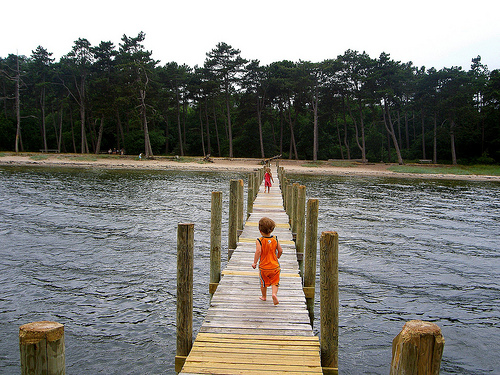

['A child in orange walking on wooden walkway built in a body of water .', 'Two children are running down a bridge across a lake .', 'Two children run along a boardwalk that crosses over a body of water .', 'Two children walking on a wooden pier over water .', 'Two children wearing orange walk across a long pier .']


In [ ]:
from IPython.display import Image, display

fold_path = "train_imgs"
img_name = os.listdir("train_imgs")[66]
file_path = os.path.join(fold_path , img_name)

display(Image(filename = file_path,width=300, height=300))
print(imgs_caps[img_name])

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Input
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3()
model.trainable = False
model.summary()

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,851,784 (90.99 MB)

In [ ]:
print(model.layers[-2].output.shape)
flat1 = Flatten()(model.layers[-2].output)
model_1 = Model(inputs=model.inputs, outputs=flat1)
#Taking the features from the second last layer (Dropping the output/last layer)

(None, 2048)


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
import tensorflow as tf

img_features = {} #Dictionary to store image embeddings from Inception model

target_size = (229, 229, 3)
imgs = os.listdir("train_imgs")
for i in range(len(imgs)):
  fold_path = "train_imgs"
  img_name = imgs[i]
  file_path = os.path.join(fold_path, img_name)
  img = tf.io.read_file(file_path)
  img = tf.io.decode_image(img,channels=3)
  img = tf.image.resize(img,[299,299]) #Input Size is 299* 299
  img = tf.expand_dims(img, axis=0)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  y_temp = model_1.predict(img)

  if img_name not in img_features:
    img_features[img_name] = []
    img_features[img_name].append(y_temp)
  else:
    img_features[img_name].append(y_temp)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━

In [ ]:
imgs = os.listdir("val_imgs")
for i in range(len(imgs)):
  fold_path = "val_imgs"
  img_name = imgs[i]
  file_path = os.path.join(fold_path, img_name)
  img = tf.io.read_file(file_path)
  img = tf.io.decode_image(img,channels=3)
  img = tf.image.resize(img,[299,299])
  img = tf.expand_dims(img, axis=0)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  y_temp = model_1.predict(img)

  if img_name not in img_features:
    img_features[img_name] = []
    img_features[img_name].append(y_temp)
  else:
    img_features[img_name].append(y_temp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
print(len(img_features.keys()))

7000


In [ ]:
import pickle

print(len(img_features.keys()))

with open('image_features_train_inception.pkl', 'wb') as f:
    pickle.dump(img_features, f)

7000


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8185


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#Map sequences to categorical labels
def get_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()

    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

In [ ]:
cap = train_dic1[list(train_dic1.keys())[0]][0]
print(cap)
seq = tokenizer.texts_to_sequences([cap])[0]
print(seq)

out_seq = to_categorical([seq[len(seq)-1]], num_classes=vocab_size)[0]

startseq black dog is running after white dog in the snow endseq
[1, 15, 9, 6, 32, 263, 14, 9, 3, 4, 42, 2]


In [ ]:
seq

[1, 15, 9, 6, 32, 263, 14, 9, 3, 4, 42, 2]

In [ ]:
out_seq

array([0., 0., 1., ..., 0., 0., 0.])

# Generating emebeddings for captions!

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-11-09 19:08:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-09 19:08:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-09 19:08:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

CrowdFlowerAnnotations.txt  glove.6B.300d.txt
ExpertAnnotations.txt	    glove.6B.50d.txt
Flicker8k_Dataset	    glove.6B.zip
Flickr8k_Dataset.zip	    image_features_train_inception.pkl
Flickr_8k.devImages.txt     __MACOSX
Flickr8k.lemma.token.txt    readme.txt
Flickr_8k.testImages.txt    refined_words.txt
Flickr8k_text.zip	    sample_data
Flickr8k.token.txt	    test_imgs
Flickr_8k.trainImages.txt   train_imgs
glove.6B.100d.txt	    val_imgs
glove.6B.200d.txt
/content


In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.200d.txt', encoding='utf-8') # Taking glove embeddigs of size 200
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
#Get the word embeddings for each word in the vocab

idxtoword = {}
wordtoidx = {}

ix = 1
for w in vocab:
    wordtoidx[w] = ix
    idxtoword[ix] = w
    ix += 1

vocab_size = len(idxtoword) + 1
vocab_size

#There is one word for which embedding is not available

8184

In [ ]:
embedding_dim = 200

# Get 200-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

(8184, 200)

In [ ]:
max_len_train

35

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Dropout, Dense, LSTM, Input, Concatenate, BatchNormalization,add

# Define the inputs
inputs1 = Input(shape=(2048,))
inputs2 = Input(shape=(max_len_train,))

# Feature branch
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(512, activation='relu')(fe1)

# Sequence branch
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(512)(se2)

# Merge the branches
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
bn1 = BatchNormalization()(decoder2)
outputs = Dense(vocab_size, activation='softmax')(bn1)

# Create the model
caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)


In [ ]:
caption_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 35, 200)   │  1,636,800 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 35, 200)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 35)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │  1,049,088 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 512)       │  1,460,224 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8184)      │  2,103,288 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,381,752 (24.34 MB)

 Trainable params: 6,381,240 (24.34 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.0025))

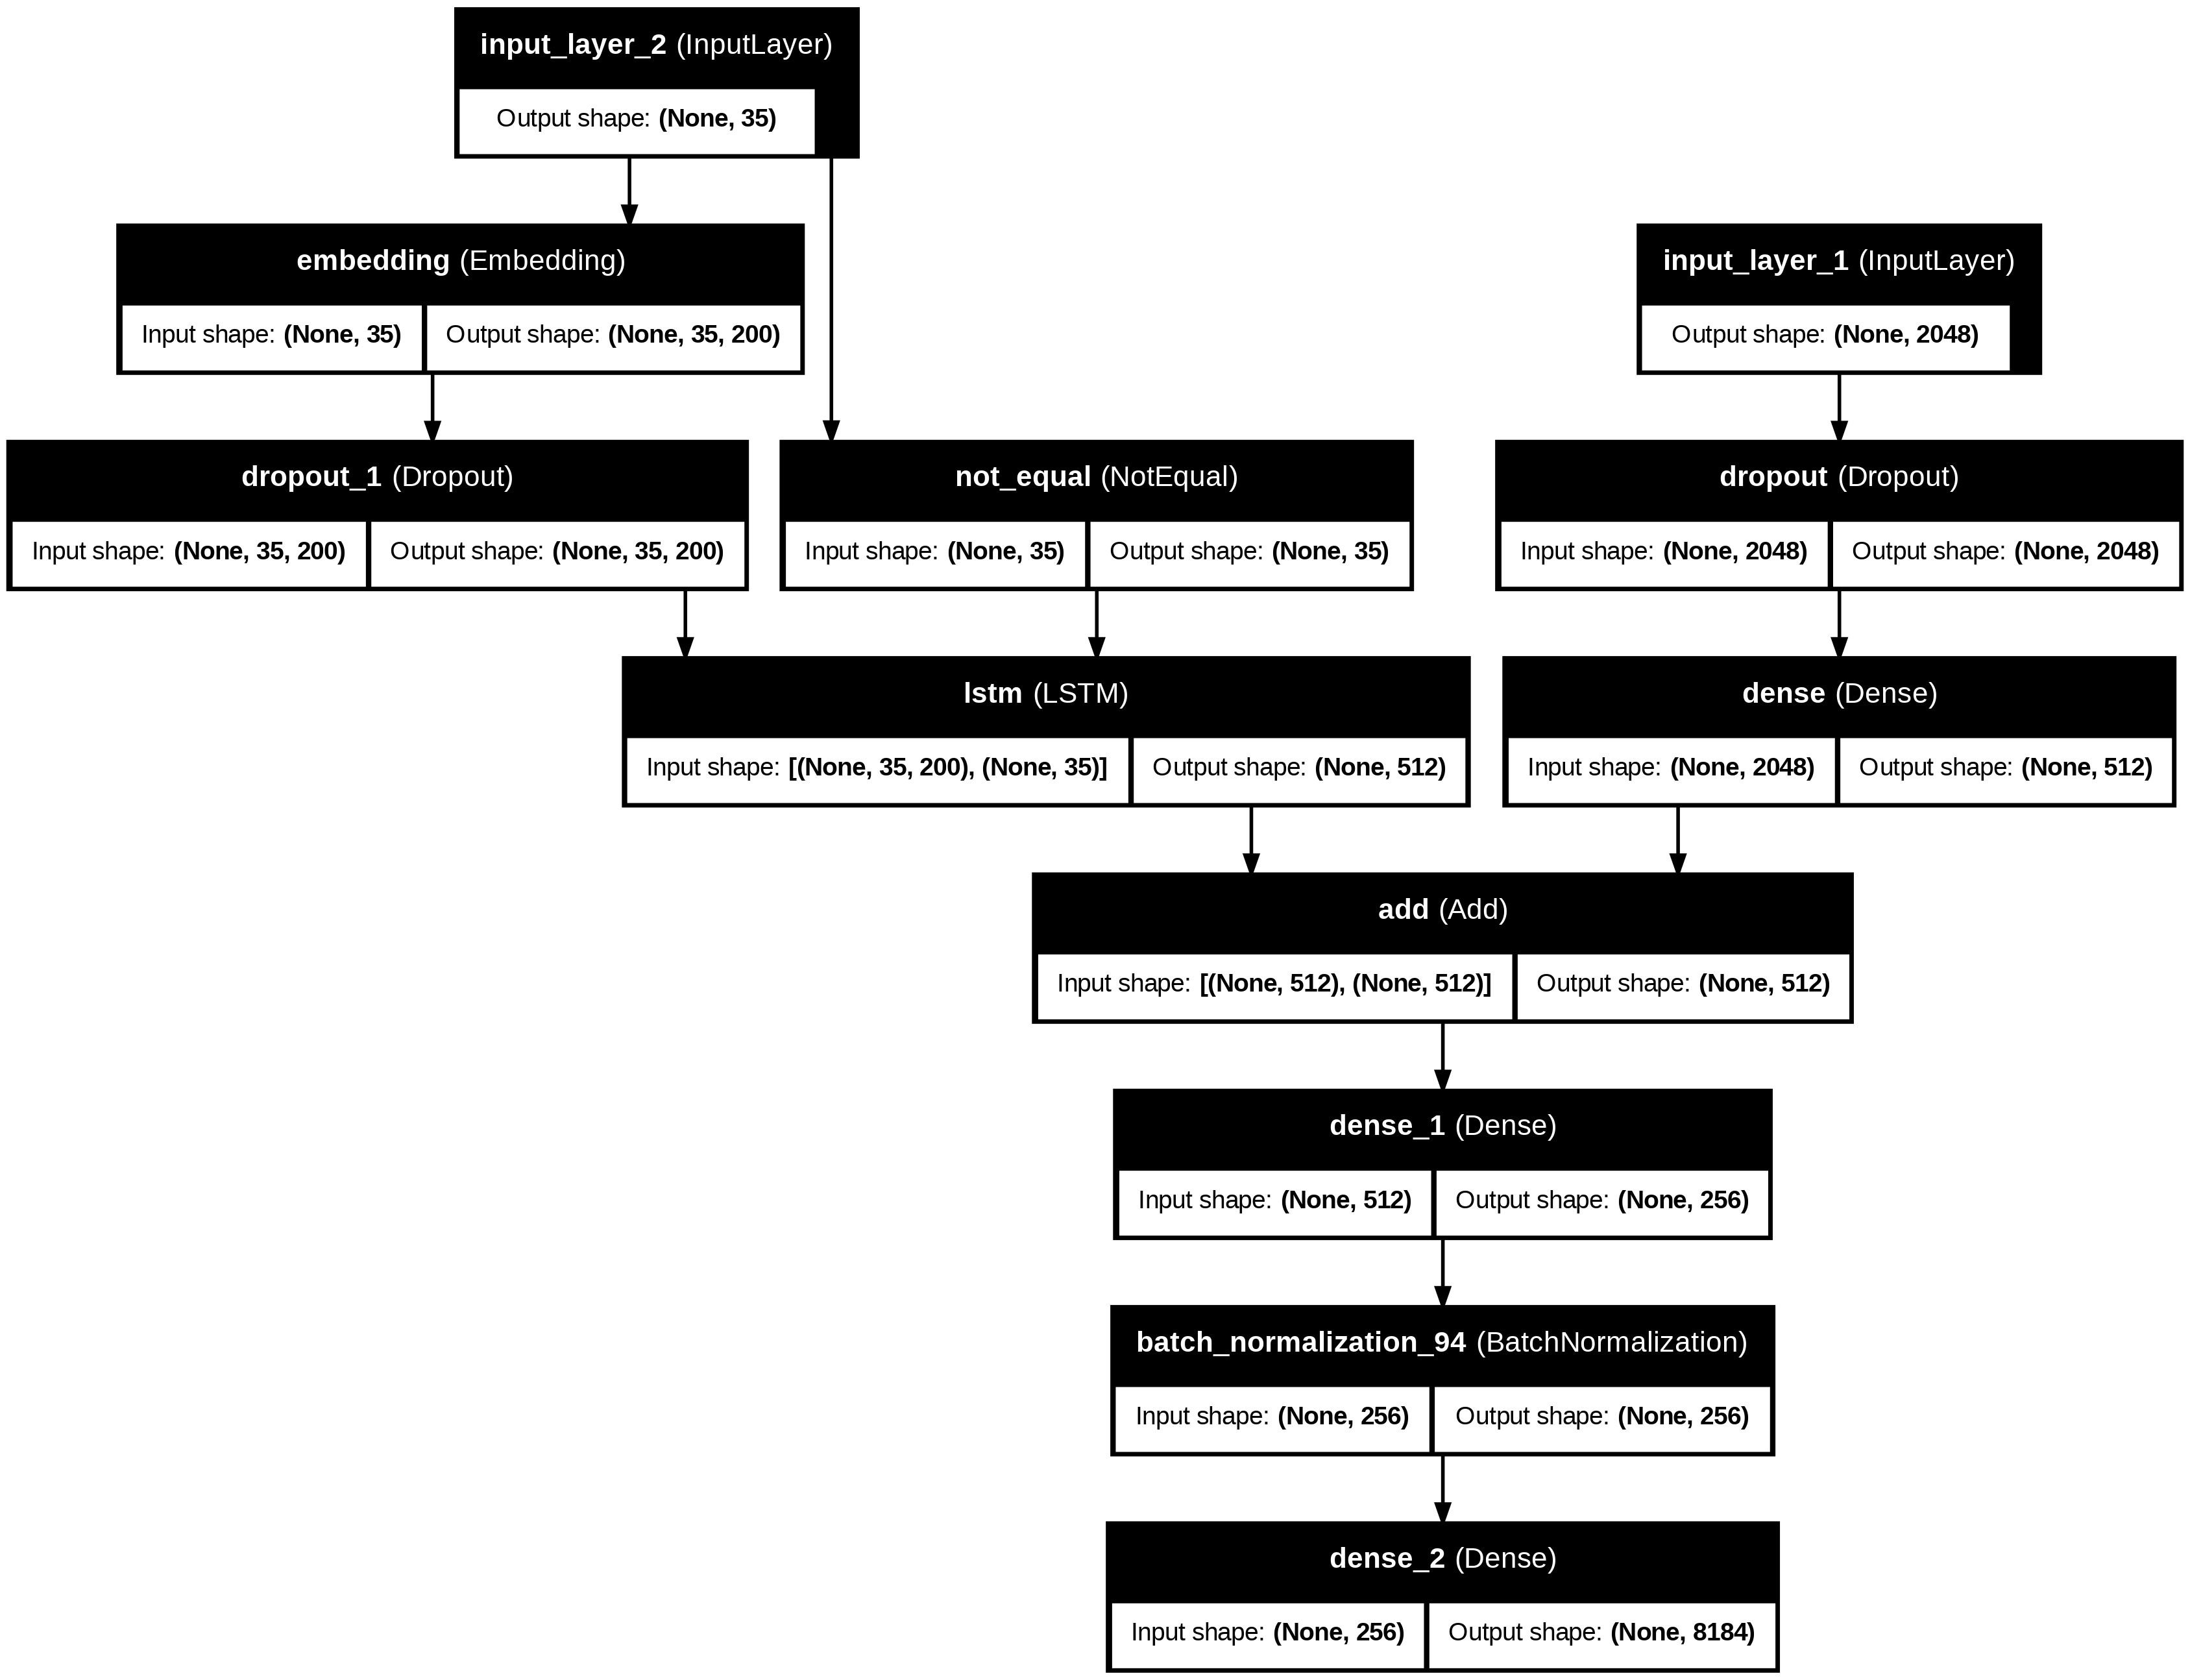

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(caption_model, show_shapes=True, show_layer_names=True)

In [ ]:
img_features_final = {}
keys_imgs = img_features.keys()

for key in keys_imgs:
  if key not in img_features_final:
    img_features_final[key] = img_features[key][0][0]

In [ ]:
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def load_clean_descriptions(filename):
  doc = load_doc(filename)
  descriptions = dict()
  for line in doc.split('\n'):
    tokens = line.split()
    image_id, image_desc = tokens[0], tokens[1:]
    desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
    descriptions[image_id] = ' '.join(desc)

  return descriptions

def create_tokenizer(descriptions):
  lines = list(descriptions.values())
  lines_f = []
  for l in lines:
    lines_f += l
  # print("lines = ",lines_f)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines_f)
  return tokenizer


def load_photo(filename):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img,channels=3)
  img = tf.image.resize(img,[299,299])
  img = tf.expand_dims(img, axis=0)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  # print(filename)
  image_id = filename.split('/')[-1].split('.')[0]
  # print(image_id)
  return img, image_id

def create_sequences(tokenizer, max_length, desc, image_id, img_features_final):
  Ximages, XSeq, y = list(), list(),list()
  vocab_size = len(tokenizer.word_index)
  # print("v_size = ", vocab_size)
  # print(desc, "\n")

  seq = tokenizer.texts_to_sequences(desc)[0]
  for i in range(1, len(seq)):
    in_seq, out_seq = seq[:i], seq[i]
    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

    Ximages.append(img_features_final[image_id])
    XSeq.append(in_seq)
    y.append(out_seq)
  Ximages, XSeq, y = array(Ximages), array(XSeq), array(y)
  return [Ximages, XSeq, y]

def data_generator(descriptions, tokenizer, max_length, img_features_final):
  directory = "train_imgs"
  while 1:
    for name in (listdir(directory)):
      filename = directory + '/' + name
      image, image_id = load_photo(filename)
      desc = descriptions[image_id]
      image_id = image_id + '.jpg'
      in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc, image_id, img_features_final)
      # print(in_img.shape)
      # print(in_seq.shape)
      # print()
      yield [[in_img, in_seq], out_word]

descriptions = train_dic1
tokenizer1 = create_tokenizer(descriptions)
max_length = max_len_train
print('Description Length: %d' % max_length)
print("Vocabulary length is ", len(tokenizer1.word_index))


# test the data generator
generator = data_generator(train_dic1, tokenizer, max_len_train, img_features_final)

inputs, outputs = next(generator)
print("-----")
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [ ]:
img_features[list(img_features.keys())[100]][0].shape

In [ ]:
len(train_dic1), max_len_train

In [ ]:
import pickle
with open('tokenizer_inception_v3.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#os.mkdir("models")

In [ ]:
epochs = 10
steps = len(train_dic1)
for epoch in range(1, epochs+1):
    generator = data_generator(train_dic1, tokenizer, max_len_train, img_features_final)

    for step in range(steps):
        inputs, outputs = next(generator)
        img_inp = inputs[0]
        inp_seq = inputs[1]
        caption_model.fit(x=[img_inp, inp_seq], y=outputs, epochs=1, verbose=1)

    file_name = 'models/caption_model_{}.h5'.format(epoch)
    caption_model.save(file_name)

!ls models/

In [ ]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
def get_prediction(model, tokenizer, photo, max_length):
  in_text = 'startseq'
  for i in range(max_length):

    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_length)

    yhat = model.predict([photo,sequence], verbose=0)

    yhat = np.argmax(yhat)

    word = word_for_id(yhat, tokenizer)

    if word is None:
      break

    in_text += ' ' + word

    if word == 'endseq':
      break

  return in_text

In [ ]:
def extract_features(filename):
  model = InceptionV3()
  model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

  #img_name = imgs[i]
  #file_path = os.path.join(fold_path , img_name)
  file_path = filename
  img = tf.io.read_file(file_path)
  img = tf.io.decode_image(img,channels=3)
  img = tf.image.resize(img,[299,299])
  img = tf.expand_dims(img, axis=0)
  img = tf.keras.applications.inception_v3.preprocess_input(img)

  # y_temp = model_1.predict(img)
  # image_new = load_img(filename, target_size=(229, 229))
  # image_new = np.array(image_new)
  # image_new = img_to_array(image_new)
  # image_new = image_new.reshape((1, image_new.shape[0], image_new.shape[1], image_new.shape[2]))
  # image_new = preprocess_input(image_new)

  feature = model.predict(img, verbose=0)
  return feature

# Generating predictions from the trained model.
Please note that we trained the model for a few epochs only.

In [ ]:
!pip install numpy==1.19.3

In [ ]:
val_imgs

In [ ]:
"""

can we try a test image which can have better caption and also keep this one to highlight that the model is not perfect

also start seq and end seq need to be done away with !!

"""


from IPython.display import Image, display
import keras
from keras.models import load_model
trained_model = load_model("models/caption_model_10.h5")
file_name = "train_imgs/3110174991_a4b05f8a46.jpg"
display(Image(filename = file_name,width=300, height=300))
photo1 = extract_features(file_name)
caption = get_prediction(trained_model, tokenizer, photo1, max_len_train)
print(caption)

In [ ]:
test_imgs

In [ ]:
file_name = "test_imgs/2723477522_d89f5ac62b.jpg"
display(Image(filename = file_name,width=300, height=300))
photo1 = extract_features(file_name)
caption = get_prediction(trained_model, tokenizer, photo1, max_len_train)
print(caption)

# Computing BLEU-1 Score

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
test_caps['2723477522_d89f5ac62b.jpg']

In [ ]:
actual = []
for each in test_caps['2723477522_d89f5ac62b.jpg']:
    actual.append(each.split(' '))
actual #The tokenized list of captions from the dataset

In [ ]:
caption #Predicted

In [ ]:
caption.split(' ')[1:-1] #Remove startseq and endseq

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print('BLEU score -> {}'.format(sentence_bleu(actual, caption))) #(reference [actual], candidate [predicted caption])

The BLEU score compares a sentence against one or more reference sentences and tells how well does the candidate sentence matched the list of reference sentences. It gives an output score between 0 and 1. A BLEU score of 1 means that the candidate sentence perfectly matches one of the reference sentences.

## Calculating the n-gram score

While matching sentences you can choose the number of words you want the model to match at once. For example, you can choose for words to be matched one at a time (1-gram). Alternatively, you can also choose to match words in pairs (2-gram) or triplets (3-grams).

In the sentence_bleu() function you can pass an argument with weights corresponding to the individual grams.

Individual 1-gram: (1, 0, 0, 0)
Individual 2-gram: (0, 1, 0, 0)
Individual 3-gram: (0, 0, 1, 0)
Individual 4-gram: (0, 0, 0, 1)

In [ ]:
print('Individual 1-gram: %f' % sentence_bleu(actual, caption, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(actual, caption, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(actual, caption, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(actual, caption, weights=(0, 0, 0, 1)))

Be default the sentence_bleu() function calculates the cumulative 4-gram BLEU score, also called BLEU-4.
with weights as (0.25, 0.25, 0.25, 0.25)

In [ ]:
score = sentence_bleu(actual, caption, weights=(0.25, 0.25, 0.25, 0.25))
print(score)

# Using a Pre-Trained Image Captioning Model from HuggingFace

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Using a transformers pipeline
from transformers import pipeline
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

In [ ]:
from IPython.display import Image, display
display(Image(url = "https://cdn.firstcry.com/education/2022/05/04111910/522565846.jpg",width=200, height=200))
#Use filename (instead of url) if you have the image in your local machine

In [ ]:
image_to_text("my_image")